In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
X=data.drop('quality', axis=1)
y=data['quality']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy on Wine Dataset: {accuracy*100:.2f}%")

Decision Tree Classifier Accuracy on Wine Dataset: 56.25%


In [11]:
result_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(result_df.head(10))

      Actual  Predicted
803        6          5
124        5          6
350        6          5
682        5          4
1326       6          6
976        5          5
1493       5          5
706        5          5
613        5          6
1587       6          6


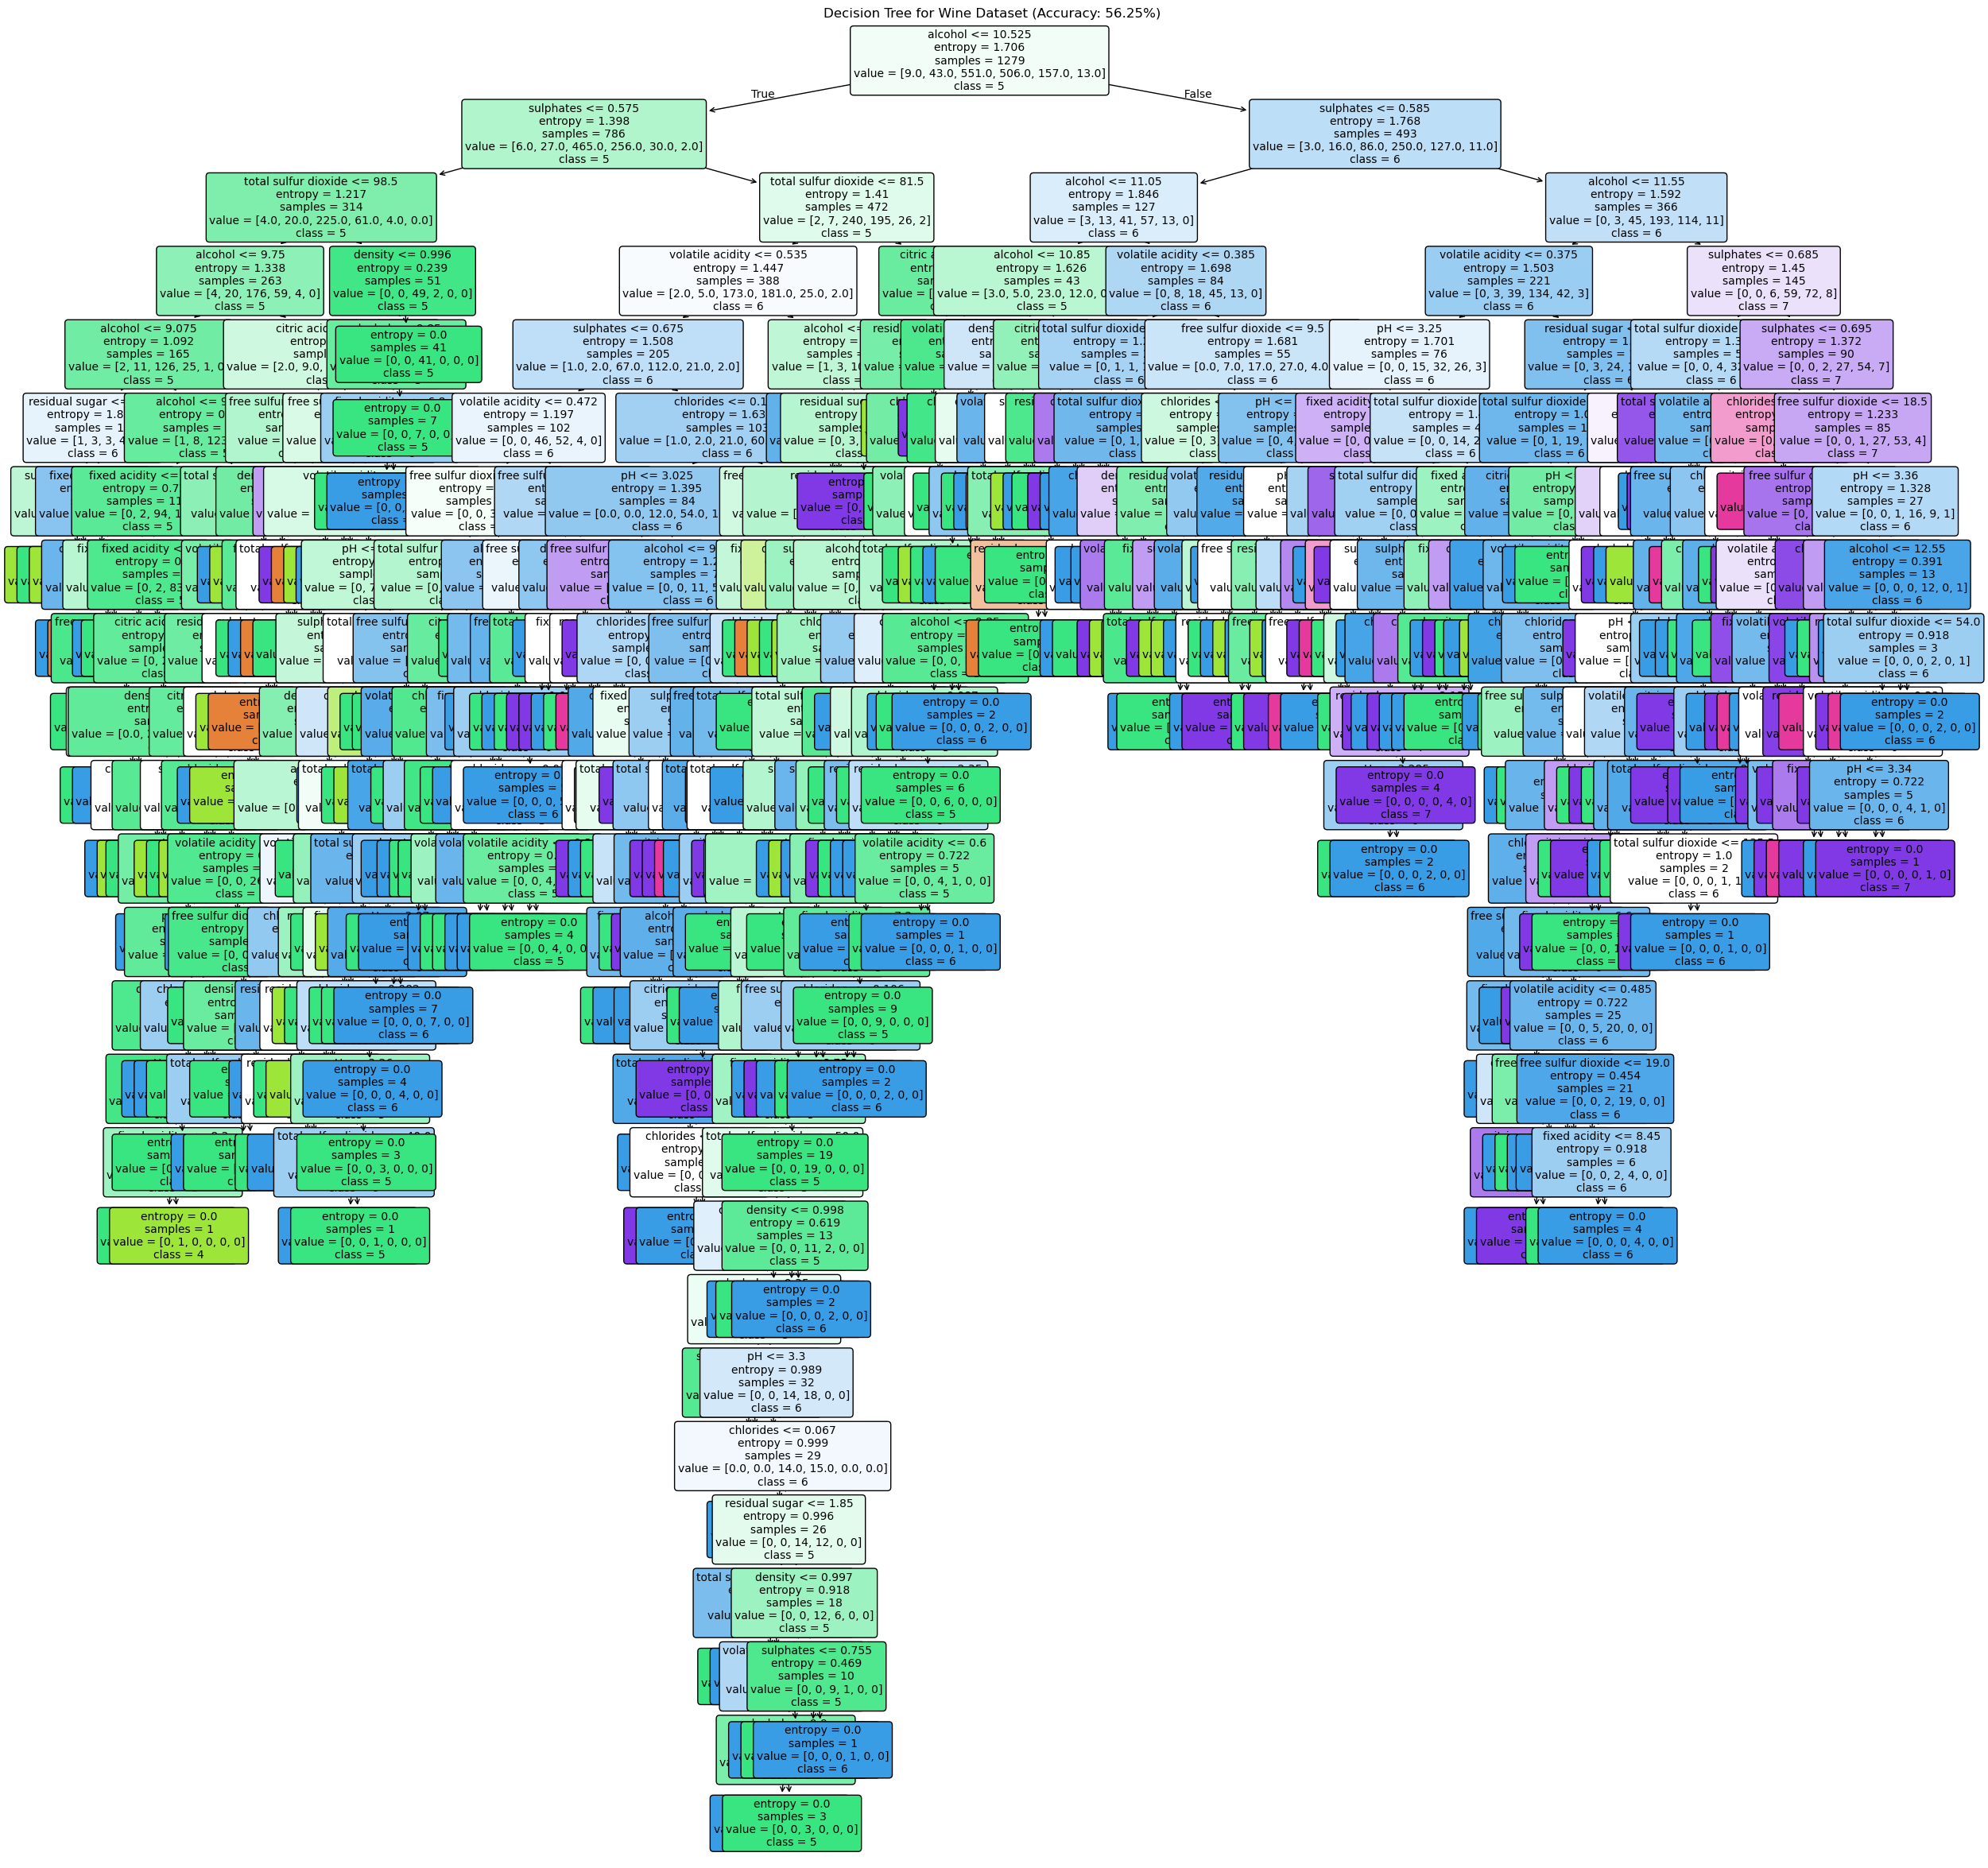

In [16]:
plt.figure(figsize=(30, 30))
plot_tree(
    model,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    rounded=True,
    fontsize=10
)
plt.title(f"Decision Tree for Wine Dataset (Accuracy: {accuracy*100:.2f}%)")
plt.show()

In [18]:
manual_input = np.array([[
    5.16,     # fixed acidity 4.6 to 15.9
    1.07,     # volatile acidity 0.12 to 1.58
    0.7,     # citiric acid 0 to 1.0
    12.5,     # residual sugar 0.9 to 15.5
    88.0,    # chlorides 0.012 to 0.611
    3.52,      # free sulfur 1.0 to 72.0
    100,      # total sulfur 6.0 to 289.0
    1.00000,      # density 0.99007 to 1.00369
    2.19,      # ph 2.74 to 4.01
    1.3,      # sulphates 0.33 to 2.0
    11.0,     # alcohol 8.4 to 14.9
]])

# Make Prediction
manual_pred = model.predict(manual_input)
print(manual_pred)

[5]


D:\python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [17]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
